<a href="https://colab.research.google.com/github/xuwei1997/FaceScoring/blob/master/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
#!mkdir -p drive
!google-drive-ocamlfuse drive

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Using TensorFlow backend.


read the data
train data and test data
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None
compile
fit
Instructions for updating:
Use tf.cast instead.
Epoch 1/16
5000/5000 [==============================] - 143s 29ms/step - loss: 1.9127
Epoch 2/16
5000/5000 [==============================] - 129s 26ms/step - loss: 0.5486
Epoch 3/16
5000/5000 [==============================] - 129s 26ms/step - loss: 0.4013
Epoch 4/16
5000/5000 [==============================] - 129s 26ms/step - loss: 0.3389
E

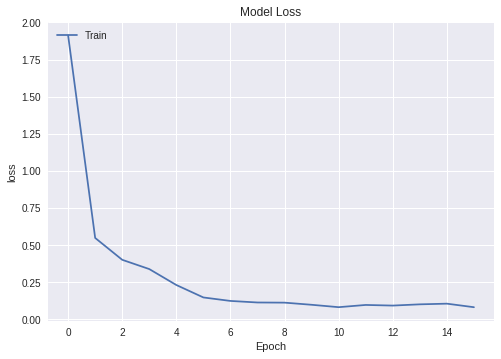

500/500 [==============================] - 10s 21ms/step
0.47338932633399966


In [1]:
#ResNet50模型训练网络
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, convolutional, pooling, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import numpy as np
from keras.utils import plot_model
from keras.applications import ResNet50
import matplotlib.pyplot as plt

#tf.test.gpu_device_name()

def show_history(history0):  # 绘制图像
    plt.plot(history0.history['loss'])
    #plt.plot(history0.history['val_acc'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('drive/app/022401.jpg')
    plt.show()


X = np.load('drive/app/X_data.npy')
Y = np.load('drive/app/Y_data.npy')
#X = np.swapaxes(X, 1, 3)
#Y = to_categorical(Y, num_classes=None)
X = X / 25
# print(X[0][0])

print("read the data")

# print(X)
# print(Y)


# 切片，统一数量级
x_train = X[:5000]
y_train = Y[:5000]
x_test = X[5000:]
y_test = Y[5000:]
print("train data and test data")

resnet = ResNet50(include_top=False,input_shape=(220,220,3), pooling='avg')
model = Sequential()
model.add(resnet)
model.add(Dense(1))

#model.layers[0].trainable = False#设置ResNet50不可训练

#print(resnet.summary())
print(model.summary())

print("compile")
model.compile(loss='mean_squared_error', optimizer=Adam())

print("fit")

Hist = model.fit(x_train, y_train, epochs=16, batch_size=64)
print(Hist.history)
show_history(Hist)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(loss_and_metrics)

model.save('drive/app/my_model.h5')

Using TensorFlow backend.


read
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


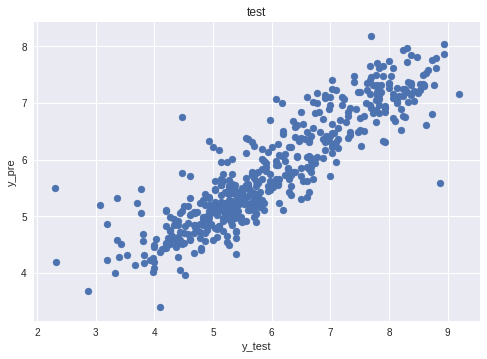

In [1]:
from keras.models import Sequential
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

X = np.load('drive/app/X_data.npy')
Y = np.load('drive/app/Y_data.npy')
X = X / 25
print("read")
x_test = X[5000:]
y_test = Y[5000:]

model=Sequential()
model=load_model('drive/app/my_model.h5')

y_pre=model.predict(x_test, batch_size=None, verbose=0, steps=None)

plt.title("test")
plt.xlabel("y_test")
plt.ylabel("y_pre")
plt.scatter(y_test,y_pre)
#plt.plot(x_test,x_pre,"ob")
plt.savefig('drive/app/022402.jpg')
plt.show()